<a href="https://colab.research.google.com/github/barauna-lo/Colored_Noise/blob/main/LSTM_4_FINISHiT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas, math, numpy
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, GRU 

from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense, LSTM, GRU

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
from datetime import datetime # for put the time info in each plot          #https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python

In [ ]:
!pip install --upgrade --no-cache-dir gdown #If they do not allow donwload
!gdown --id 1KzPoPcXQghi2dxSc4ZPhO5Rz9QB0PWHv            #normalized data

In [3]:
#df = pd.read_csv("C:/Users/luano/Documents/LSTM/LSTM 3/color_norm.csv")  #FOR WINDOWS
#!gdown --id 1V_S8hoqK9g5mCMxwRGZbsyhuK7KjxZHl            #FOR GOOGLECOLAB
#!gdown --id 1KzPoPcXQghi2dxSc4ZPhO5Rz9QB0PWHv            #normalized data
df = pd.read_csv("color_norm.csv")
# dfn['beta'] = dfn['beta'].str.split(',').map(lambda x: list(map(float, x)))
df['Series']    = df['Series'].str.split(',').map(   lambda x: list(map(float, x)))
df['PSD']       = df['PSD'].str.split(',').map(      lambda x: list(map(float, x)))
df['Frequency'] = df['Frequency'].str.split(',').map(lambda x: list(map(float, x)))


In [163]:

#serie_index = 0  #white Noise
serie_index = 40 #pink noise
#serie_index =  81#red Noise

min_size , max_size = 0 , 30000

dataframe = pd.DataFrame({"Serie":df['Series'][serie_index][min_size:max_size]})
dataset = dataframe.values
dataset = dataset.astype('float32')

beta = str(df['beta'][serie_index])

In [164]:
# definindo as amostras de treinamento e teste segundo o hold-out.
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# conversão da série temporal em uma matriz de atributos para regressão
def create_dataset(dataset, look_back=10):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# Atributos X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY   = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [178]:
#Setting Random seeds🌱
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(3)

# create and fit the LSTM or GRU network
#modelo = LSTM
modelo = GRU

model = Sequential()
model.add(modelo(10, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.MeanSquaredError(),metrics.AUC(),])

history = model.fit(trainX, trainY, epochs=100, batch_size=len(trainX), verbose=0,validation_split=0.8)

In [179]:
#Alocating a Model Variabel
modelo_nome = 'GRU' if str(modelo)[-5:-2] == 'GRU' else 'LSTM'
modelo_nome

'GRU'

In [180]:
##Alocating the results 
# FOR DIFERTENTS ARQUITECTURES

if modelo_nome == 'GRU':
  loss_GRU     = history.history['loss']
  val_loss_GRU = history.history['val_loss']
  epochs_GRU   = np.arange(0,len(loss))
  #Defing a general file name
  filename_traingXloss ="TraingLoss_beta"+str(df['beta'][serie_index])+"_timeSerieSize="+str(max_size-min_size)+"_nsteps="+str(look_back)+"_eposch="+str(len(epochs))+str(modelo_nome)
else: 
  loss_LSTM     = history.history['loss']
  val_loss_LSTM = history.history['val_loss']
  epochs_LSTM   = np.arange(0,len(loss))
  #Defing a general file name
  filename_traingXloss ="TraingLoss_beta"+str(df['beta'][serie_index])+"_timeSerieSize="+str(max_size-min_size)+"_nsteps="+str(look_back)+"_eposch="+str(len(epochs))+str(modelo_nome)

#Saving a DataFrame with the Results
#df_results = pd.DataFrame({'loss': loss, 'val_los': val_loss,'epochs':epochs})         
#df_results.to_csv((filename_traingXloss+".csv"), index=False)


In [181]:
##Alocating the results
loss =     history.history['loss']
val_loss = history.history['val_loss']
epochs = np.arange(0,len(loss))

#Defing a general file name
filename_traingXloss ="TraingLoss_beta"+str(df['beta'][serie_index])+"_timeSerieSize="+str(max_size-min_size)+"_nsteps="+str(look_back)+"_eposch="+str(len(epochs))+str(modelo_nome)

#Saving a DataFrame with the Results
df_results = pd.DataFrame({'loss': loss, 'val_los': val_loss,'epochs':epochs})         
df_results.to_csv((filename_traingXloss+".csv"), index=False)



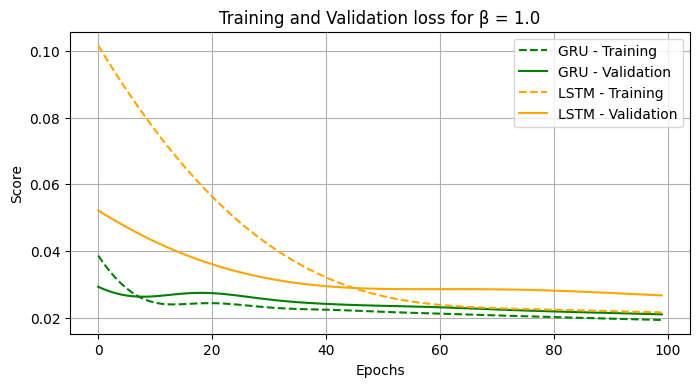

In [182]:
#Plot the Training and Validation loss
plt.figure(figsize=(8, 4),dpi=100)
plt.plot(epochs_GRU,loss_GRU,      label='GRU - Training',  color='green',linestyle='--')
plt.plot(epochs_GRU,val_loss_GRU,  label='GRU - Validation',color='green',linestyle='-')
plt.plot(epochs_LSTM,loss_LSTM,    label='LSTM - Training',  color='orange',linestyle='--')
plt.plot(epochs_LSTM,val_loss_LSTM,label='LSTM - Validation',color='orange',linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Score')
# Ploting the max value of vall_loss. We dont need these all the time, only whem test limits of the network
#plt.scatter(history.history['val_loss'].index(min(history.history['val_loss'])),min(history.history['val_loss']),label=('Min Loss ='+str(round(min(history.history['val_loss']),3))+"\nEpoch = "+str(history.history['val_loss'].index(min(history.history['val_loss'])))),color='purple',zorder=3,marker='*',linewidths=2)
#plt.scatter(history.history['loss'].index(min(history.history['loss'])),min(history.history['loss']),label=('Max Val Loss ='+str(round(min(history.history['loss']),3))+"\nEpoch = "+str(history.history['loss'].index(max(history.history['loss'])))),color='purple',zorder=3,marker='*',linewidths=2)
plt.legend()
plt.title(f"Training and Validation loss for β = {beta}")
#time = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')).replace(":","_") # What time is that? 
time = "EOSBF_"
plt.savefig(time+filename_traingXloss+".pdf")                             #Saving the figure with the currently data and time
plt.grid()
plt.show()

In [183]:
# make predictions
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)
# trainY1      =([trainY])
# testY1       =([testY])

# # calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY1[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY1[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
model_data =  numpy.empty_like(dataset) #creating a empyt vector
model_data[look_back:len(trainPredict)+look_back, :] = trainPredict #alocating the the traint data generatead by the model
model_data[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict #alocating the the test data generatead by the model
model_data = (np.reshape(model_data,(len(model_data))))
model_data[:look_back] = numpy.nan
#model_data = model_data[look_back:]

# Killing divergences
for i in range(len(model_data)):
    if model_data[i] > 1: model_data[i] = numpy.nan
    #if model_data[i] < 0.0001: model_data[i] = 0


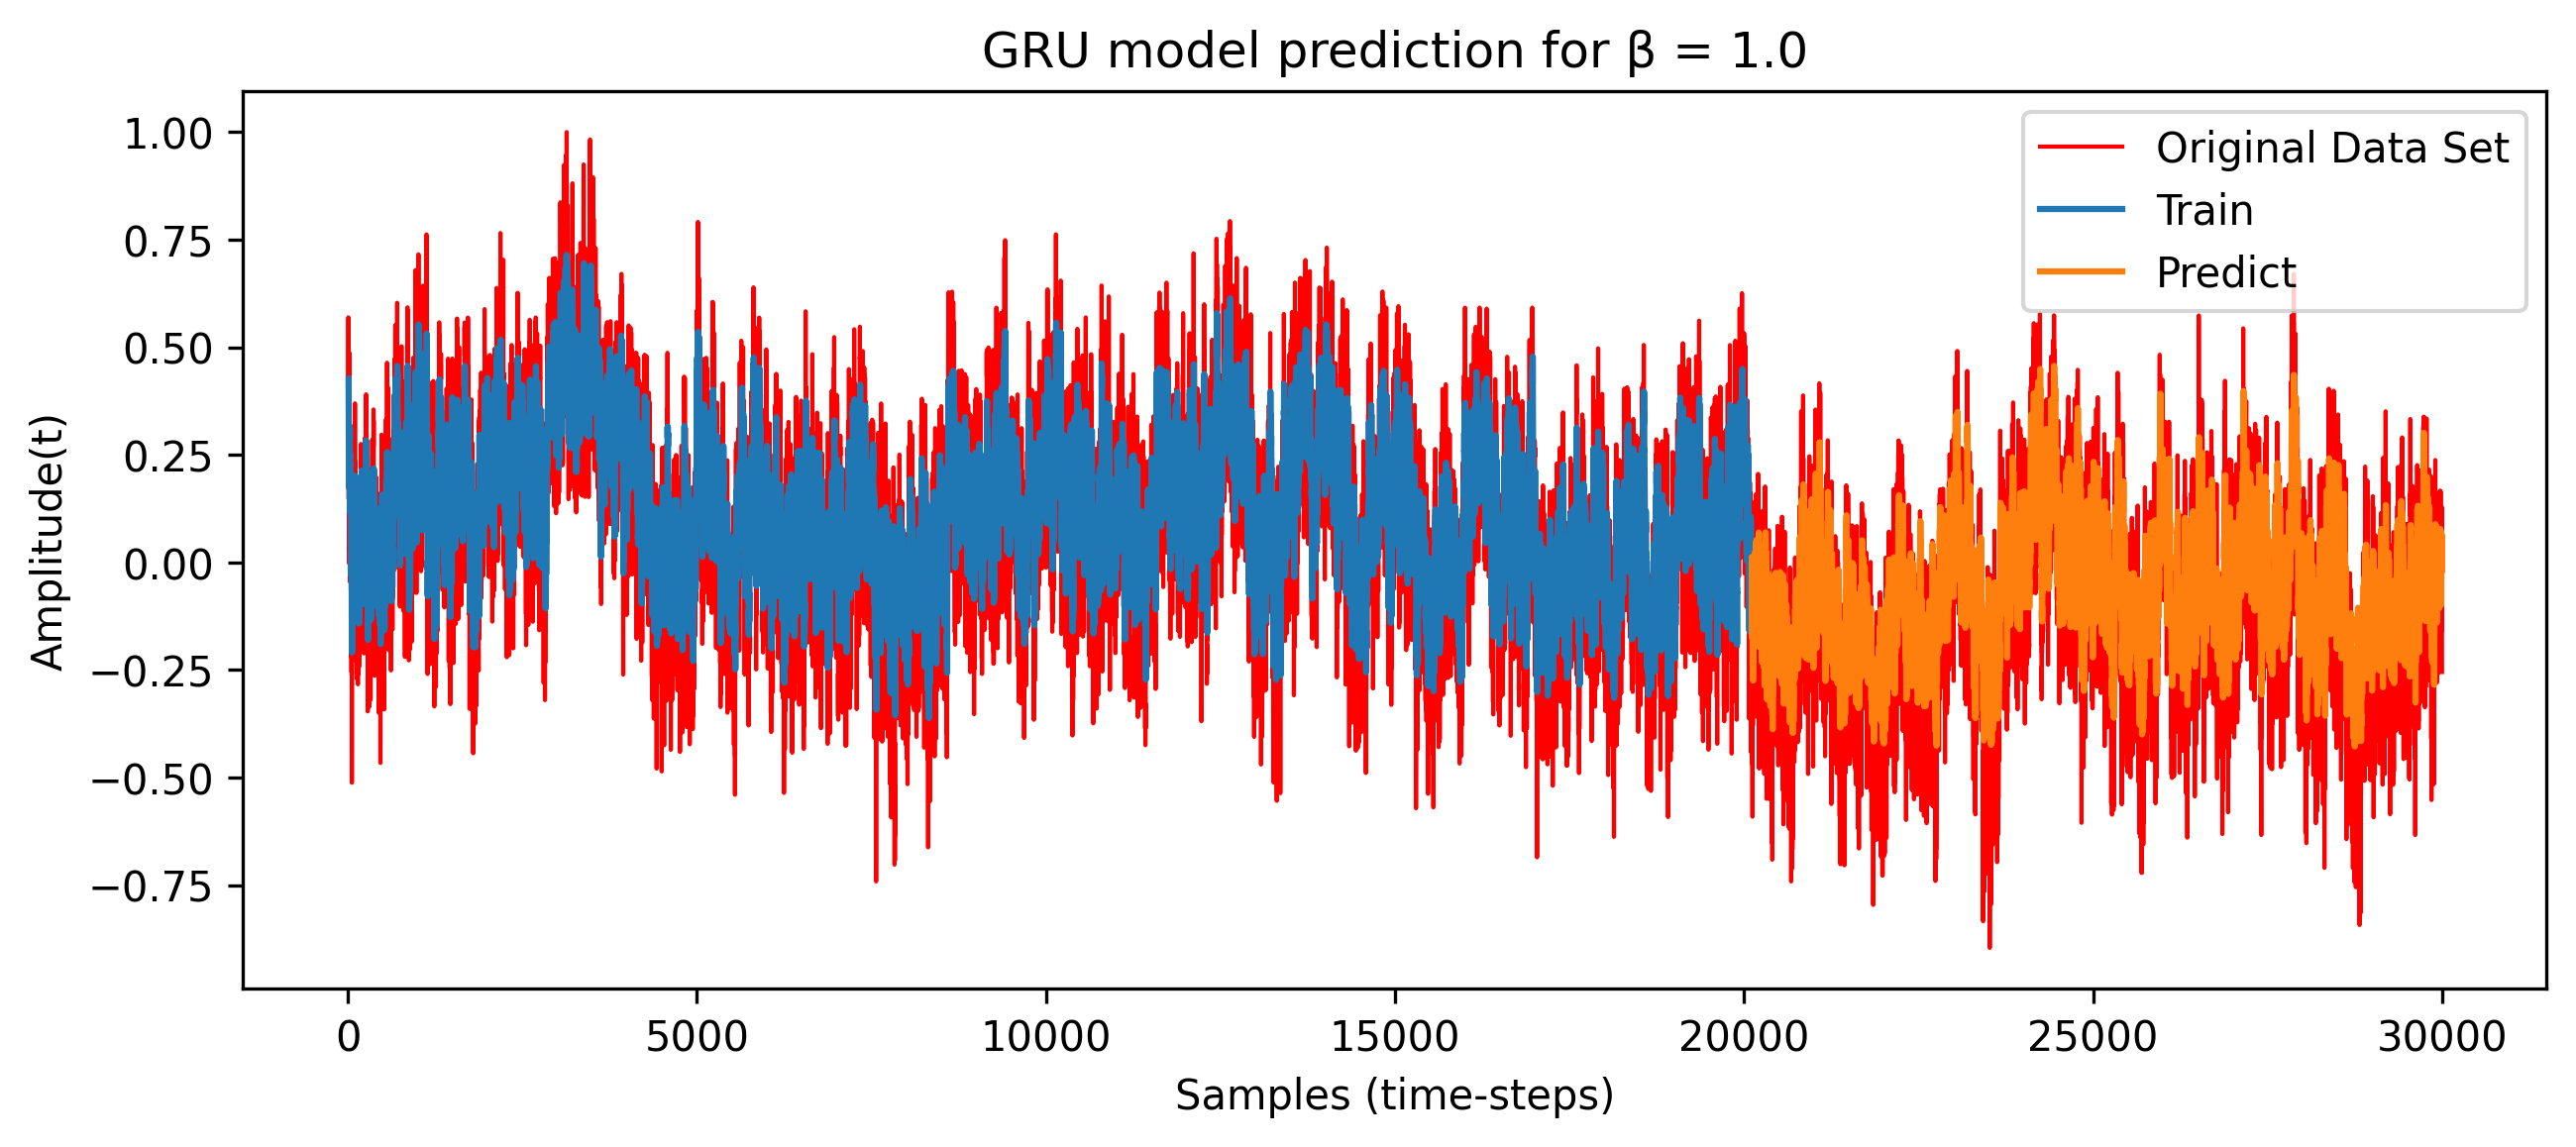

In [184]:
if   beta == 0: df_color = 'black'
elif beta == 1: df_color = 'magenta'
else:           df_color = 'red'

grossura = 0.1 if beta == 0 else 1

time = "EOSBF_"
plt.figure(figsize = (10,4), dpi=300)
plt.plot(dataset,label="Original Data Set",color = df_color,linewidth=grossura)
plt.plot(trainPredictPlot,label='Train')
plt.plot(testPredictPlot,label='Predict')
plt.title(str(modelo_nome)+' model prediction for β = '+str(beta))
#plt.plot(model_data,linestyle='--',linewidth=0.4)
#plt.plot(x,df['Series'][serie_index][max_size:max_size+len(x)])
plt.ylabel('Amplitude(t)')
plt.xlabel('Samples (time-steps)')
plt.legend()
plt.savefig(time+'Results_beta_'+beta+'model_'+modelo_nome+'lookback_'+str(look_back)+'npoins_'+str(max_size+min_size)+".pdf")
plt.show()

In [185]:
#Alocating these results in a dataframe
df_time =  pd.DataFrame(dataset[:2**int(np.log2(len(dataset)))])
df_model = pd.DataFrame(model_data[:2**int(np.log2(len(model_data)))])

#Creating and save has a CSV
df_time.to_csv("time.csv", index=False, header=False)
df_model.to_csv("model.csv", index=False, header=False)

#Generate 
time_series = list(np.reshape(dataset,(1,len(dataset)))[0])
data_model = list(model_data)
df_final = pd.DataFrame({"time_series":time_series,"model_data":data_model})

modelos = 'LSTM' if str(modelo)[-6:-2] else 'GRU'
#time = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')).replace(":","_")    
time = "EOSBF_"
df_final.to_csv(time+'beta_'+beta+'model_'+modelos+'lookback_'+str(look_back)+'npoins_'+str(max_size+min_size)+".csv")

In [186]:
#csv_para_txt
import csv
with open("serie_time.txt", "w") as my_output_file: 
    with open("time.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

with open("model_data.txt", "w") as my_output_file: 
    with open("model.csv", "r") as my_input_file: [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()
#

In [187]:
############################################################################
# #The following lines its a code provid by Reinaldo Rosa called SpecPlus.
# #the original code is on google colab. Here, is just a resume
############################################################################



def specplus(nomeArquivo):
    cor = 'black' if nomeArquivo == 'serie_time.txt' else 'C0'

    titulo =  'Original Time Series Data' if nomeArquivo == 'serie_time.txt'  else 'Model Time Series Data'


    import matplotlib.pyplot as plt
    import matplotlib.mlab as mlab
    from scipy import stats, optimize
    import numpy as np
    import math
    __authors__ = 'Paulo Giovani & Reinaldo Rosa'
    __copyright__ = 'Copyright 2017, 3DBMO Project INPE'
    __credits__ = ['Paulo Giovani', 'Reinaldo Roberto Rosa', 'Murilo da Silva Dantas']
    __license__ = 'GPL'
    __version__ = '0.1B'
    __maintainer__ = 'Paulo Giovani'
    __email__ = 'pg_faria@yahoo.com.br'
    time = str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')).replace(":","_")    
    #---------------------------------------------------------------------
    # Calcula o PSD da série temporal
    #---------------------------------------------------------------------
    def psd(data):
        """Calcula o PSD de uma série temporal."""
        # Define um intervalo para realizar o ajuste da reta
        INICIO = 10
        FIM = 5000
        # O vetor com o tempo é o tamanho do número de pontos
        N = len(data)
        tempo = np.arange(len(data))
        # Define a frequência de amostragem
        dt = (tempo[-1] - tempo[0] / (N - 1))
        fs = 1 / dt
        # Calcula o PSD utilizando o MLAB
        power, freqs = mlab.psd(data, Fs = fs, NFFT = N, scale_by_freq = False)
        # Calcula a porcentagem de pontos utilizados na reta de ajuste
        totalFrequencias = len(freqs)
        totalPSD = FIM - INICIO
        porcentagemPSD = int(100 * totalPSD / totalFrequencias)
        # Seleciona os dados dentro do intervalo de seleção
        xdata = freqs[INICIO:FIM]
        ydata = power[INICIO:FIM]
        # Simula o erro
        yerr = 0.2 * ydata
        # Define uma função para calcular a Lei de Potência
        powerlaw = lambda x, amp, index: amp * (x**index)
        # Converte os dados para o formato LOG
        logx = np.log10(xdata)
        logy = np.log10(ydata)
        # Define a função para realizar o ajuste
        fitfunc = lambda p, x: p[0] + p[1] * x
        errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err    
        logyerr = yerr / ydata
        # Calcula a reta de ajuste
        pinit = [1.0, -1.0]
        out = optimize.leastsq(errfunc, pinit, args = (logx, logy, logyerr), full_output = 1)    
        pfinal = out[0]
        covar = out[1]
        index = pfinal[1]
        amp = 10.0 ** pfinal[0]
        indexErr = np.sqrt(covar[0][0])
        ampErr = np.sqrt(covar[1][1]) * amp
        # Retorna os valores obtidos
        return freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM

    #---------------------------------------------------------------------
    # Calcula o DFA 1D da série temporal
    #---------------------------------------------------------------------

    def dfa1d(timeSeries, grau):
        """Calcula o DFA 1D (adaptado de Physionet), onde a escala cresce
        de acordo com a variável 'Boxratio'. Retorna o array 'vetoutput', 
        onde a primeira coluna é o log da escala S e a segunda coluna é o
        log da função de flutuação."""
        # 1. A série temporal {Xk} com k = 1, ..., N é integrada na chamada função perfil Y(k)
        x = np.mean(timeSeries)
        timeSeries = timeSeries - x
        yk = np.cumsum(timeSeries)
        tam = len(timeSeries)
        # 2. A série (ou perfil) Y(k) é dividida em N intervalos não sobrepostos de tamanho S
        sf = np.ceil(tam / 4).astype(np.int)
        boxratio = np.power(2.0, 1.0 / 8.0)
        vetoutput = np.zeros(shape = (1,2))
        s = 4
        while s <= sf:        
            serie = yk        
            if np.mod(tam, s) != 0:
                l = s * int(np.trunc(tam/s))
                serie = yk[0:l]			
            t = np.arange(s, len(serie), s)
            v = np.array(np.array_split(serie, t))
            l = len(v)
            x = np.arange(1, s + 1)
            # 3. Calcula-se a variância para cada segmento v = 1,…, n_s:
            p = np.polynomial.polynomial.polyfit(x, v.T, grau)
            yfit = np.polynomial.polynomial.polyval(x, p)
            vetvar = np.var(v - yfit)
    # 4. Calcula-se a função de flutuação DFA como a média das variâncias de cada intervalo
            fs = np.sqrt(np.mean(vetvar))
            vetoutput = np.vstack((vetoutput,[s, fs]))
            # A escala S cresce numa série geométrica
            s = np.ceil(s * boxratio).astype(np.int)
        # Array com o log da escala S e o log da função de flutuação   
        vetoutput = np.log10(vetoutput[1::1,:])
        # Separa as colunas do vetor 'vetoutput'
        x = vetoutput[:,0]
        y = vetoutput[:,1]
        # Regressão linear
        slope, intercept, _, _, _ = stats.linregress(x, y)
        # Calcula a reta de inclinação
        predict_y = intercept + slope * x
        # Calcula o erro
        pred_error = y - predict_y
        # Retorna o valor do ALFA, o vetor 'vetoutput', os vetores X e Y,
        # o vetor com os valores da reta de inclinação e o vetor de erros
        return slope, vetoutput, x, y, predict_y, pred_error
    #---------------------------------------------------------------------
    # Trecho principal
    #---------------------------------------------------------------------
    def main():
        """Função com o código principal do programa."""
        #print("\nSpectral Analysis for time series...\n")
        # Desabilita as mensagens de erro do Numpy (warnings)
        old_settings = np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore')
        # Carrega o arquivo de dados
        #nomeArquivo = 'serie1.txt'		
        data = np.genfromtxt(nomeArquivo,
                             delimiter = ',',
                             dtype = 'float32',
                             filling_values = 0)
        # Exibe os primeiro N valores do arquivo
        N = 10
        #print("Original time series data (%d points): \n" %(len(data)))
        #print("First %d points: %s\n" %(N, data[0:10]))
        #print()
        #-----------------------------------------------------------------
        # Parâmetros gerais de plotagem
        #-----------------------------------------------------------------
        # Define os subplots
        fig = plt.figure(figsize=(6,4), dpi=100)
        fig.subplots_adjust(hspace = .4, wspace = .2)
        # Tamanho das fontes
        tamanhoFonteEixoX     = 16
        tamanhoFonteEixoY     = 20
        tamanhoFonteTitulo    = 16
        tamanhoFontePrincipal = 25
        # Título principal
        tituloPrincipal = 'Time Series Spectral Analysis' 	
        #-----------------------------------------------------------------
        # Plotagem da série original
        #-----------------------------------------------------------------
        # Define as cores da plotagem
        corSerieOriginal = cor# 'r'
        # Título dos eixos da série original
        textoEixoX = 'Time'
        textoEixoY = 'Amplitude'
        textoTituloOriginal = titulo
        #print("1. Plotting time series data...")
        # Plotagem da série de dados    
        #O = fig.add_subplot(1, 3, 1)    
        # O = fig.add_subplot(2, 1, 1)
        # O.plot(data, '-', color = corSerieOriginal)
        # O.set_title(textoTituloOriginal, fontsize = tamanhoFonteTitulo)
        # O.set_xlabel(textoEixoX, fontsize = tamanhoFonteEixoX)
        # O.set_ylabel(textoEixoY, fontsize = tamanhoFonteEixoY)
        # O.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
        # O.grid()
        #-----------------------------------------------------------------
        # Cálculo e plotagem do PSD                                     --
        #-----------------------------------------------------------------
        # Calcula o PSD
        freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = psd(data)
        # O valor do beta equivale ao index
        b = index
        # Define as cores da plotagem
        corPSD1 = 'k'
        #corPSD2 =  'orange' if modelo_nome == 'GRU' else 'green'
        corPSD2 =  'navy' if nomeArquivo == 'serie_time.txt' else 'orange' if modelo_nome == 'GRU' else 'green'
        # Título dos eixos do PSD
        textoPSDX = 'Frequency (Hz)'
        textoPSDY = 'PSD'
        #textoTituloPSD = r''+str(modelo_nome)+' - PSD Estimation β = '
        textoTituloPSD = r'Original Time Series - PSD Estimation β = ' if nomeArquivo == 'serie_time.txt' else r'GRU - PSD Estimation β = ' if modelo_nome == 'GRU' else r'LSTM - PSD Estimation β = '
        #print("2. Plotting Power Spectrum Density...")
        # Plotagem do PSD    
        PSD = fig.add_subplot(2, 2, (1,4))    
        PSD.plot(freqs, power, '-', color = corPSD1, alpha = 0.7)
        PSD.plot(xdata, ydata, color = corPSD2, alpha = 0.8)
        PSD.axvline(freqs[INICIO], color = corPSD2, linestyle = '--')
        PSD.axvline(freqs[FIM], color = corPSD2, linestyle = '--')    
        PSD.plot(xdata, powerlaw(xdata, amp, index), 'r-', linewidth = 1.5, label = '$%.4f$' %(b))    
        PSD.set_xlabel(textoPSDX                                  )#, fontsize = tamanhoFonteEixoX)
        PSD.set_ylabel(textoPSDY                                  )#, fontsize = tamanhoFonteEixoY)
        PSD.set_title(textoTituloPSD + '%.4f' %(b), loc = 'center')#, fontsize = tamanhoFonteTitulo)
        PSD.set_yscale('log')
        PSD.set_xscale('log')
        PSD.grid() 
        #-----------------------------------------------------------------
        # Cálculo e plotagem do DFA
        #-----------------------------------------------------------------
        # Calcula o DFA 1D
        alfa, vetoutput, x, y, reta, erro = dfa1d(data, 1)
        # Verifica se o DFA possui um valor válido
        # Em caso afirmativo, faz a plotagem
        # if not math.isnan(alfa):
        # 	# Define as cores da plotagem
        # 	corDFA = 'darkmagenta'
        # 	# Título dos eixos do DFA
        # 	textoDFAX = '$log_{10}$ (s)'
        # 	textoDFAY = '$log_{10}$ F(s)'
        # 	textoTituloDFA = r'Detrended Fluctuation Analysis $\alpha$ = '
        # 	print("3. Plotting Detrended Fluctuation Analysis...")
        # 	# Plotagem do DFA 
        # 	DFA = fig.add_subplot(2, 2, 4)    
        # 	DFA.plot(x, y, 's', 
        # 			 color = corDFA, 
        # 			 markersize = 4
        # 			 markeredgecolor = 'r',
        # 			 markerfacecolor = 'None',
        # 			 alpha = 0.8)				 
        # 	DFA.plot(x, reta, '-', color = corDFA, linewidth = 1.5)
        # 	DFA.set_title(textoTituloDFA + '%.4f' %(alfa), loc = 'center', fontsize = tamanhoFonteTitulo)
        # 	DFA.set_xlabel(textoDFAX, fontsize = tamanhoFonteEixoX)
        # 	DFA.set_ylabel(textoDFAY, fontsize = tamanhoFonteEixoY)
        # 	DFA.grid()
        # else:  
        # 	DFA = fig.add_subplot(2, 2, 4)
        # 	DFA.set_title(textoTituloDFA + 'N.A.', loc = 'center', fontsize = tamanhoFonteTitulo)
        # 	DFA.grid()
        #-----------------------------------------------------------------
        # Exibe e salva a figura
        #-----------------------------------------------------------------
        #plt.suptitle(tituloPrincipal, fontsize = tamanhoFontePrincipal)
        time = "EOSBF_"
        nomeImagem = modelo_nome+time+nomeArquivo+'ANALYSIS_PSD_DFA_.pdf'
        fig.set_size_inches(7, 4)
        plt.savefig(nomeImagem, dpi = 300, bbox_inches = 'tight', pad_inches = 0.1)	
        plt.show()
    #---------------------------------------------------------------------
    # Trecho principal
    #---------------------------------------------------------------------
    if __name__ == "__main__":
        main()
    #——————————————————————————————————————————

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

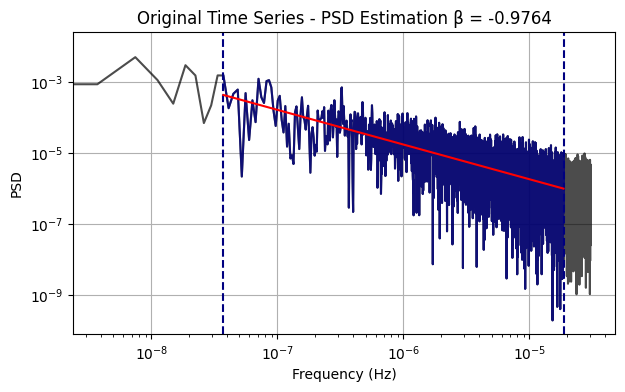

None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:88: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:109: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

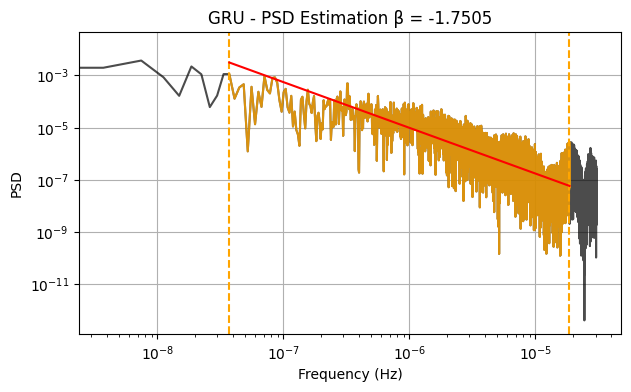

None


In [188]:
print(specplus('serie_time.txt'))
print(specplus('model_data.txt'))


In [189]:
#remove all
#!rm *

In [190]:
#Ziping Data for download📦
!zip -r /content/All_Files.zip /content